In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sn


!pip install plotly
import plotly as pl
import plotly.express as px
import sys
print(sys.path)

['F:\\FHNW\\krankenkassechallenge\\pca', 'C:\\ProgramData\\Anaconda3\\python37.zip', 'C:\\ProgramData\\Anaconda3\\DLLs', 'C:\\ProgramData\\Anaconda3\\lib', 'C:\\ProgramData\\Anaconda3', '', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\bruno\\.ipython']


# PCA with sklearn and factorized data

In [3]:
#Standardize

data = pd.read_csv("krankenkasse-mit-pbf.csv", sep = ";", names = ['age', 'sex', 'bmi', 'children', 'smoker', 'canton', "pbf", 'charges'])
data = data.iloc[1:]

data['charges'] = data['charges'].str.replace("’", "").apply(pd.to_numeric)
data['pbf'] = data['pbf'].apply(pd.to_numeric)
data['bmi'] = data['bmi'].apply(pd.to_numeric)
data['age'] = data['age'].apply(pd.to_numeric)
data['children'] = data['children'].apply(pd.to_numeric)

# Encode categorical variables.
data["sex"] = pd.factorize(data['sex'])[0]
data["smoker"] = pd.factorize(data['smoker'])[0]

data['canton'] = pd.factorize(data['canton'])[0]

# Remove encoded categorical variables.

# 1 record with negative percentage of body fat.
data = data[data["pbf"]>0]

data.head()

,age,sex,bmi,children,smoker,canton,pbf,charges
1,19,0,24.720,0,0,0,35.94,4253
2,18,1,29.416,1,1,1,26.86,2494
3,28,1,28.800,3,1,1,26.92,3138
4,33,1,20.564,0,1,2,7.98,1553
5,32,1,25.504,0,1,2,21.84,2768


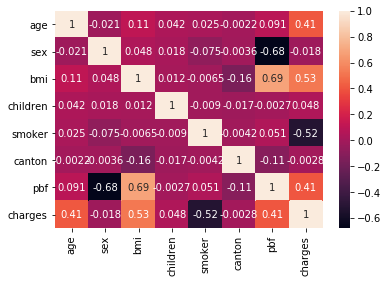

In [3]:
corrMatrix = data.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

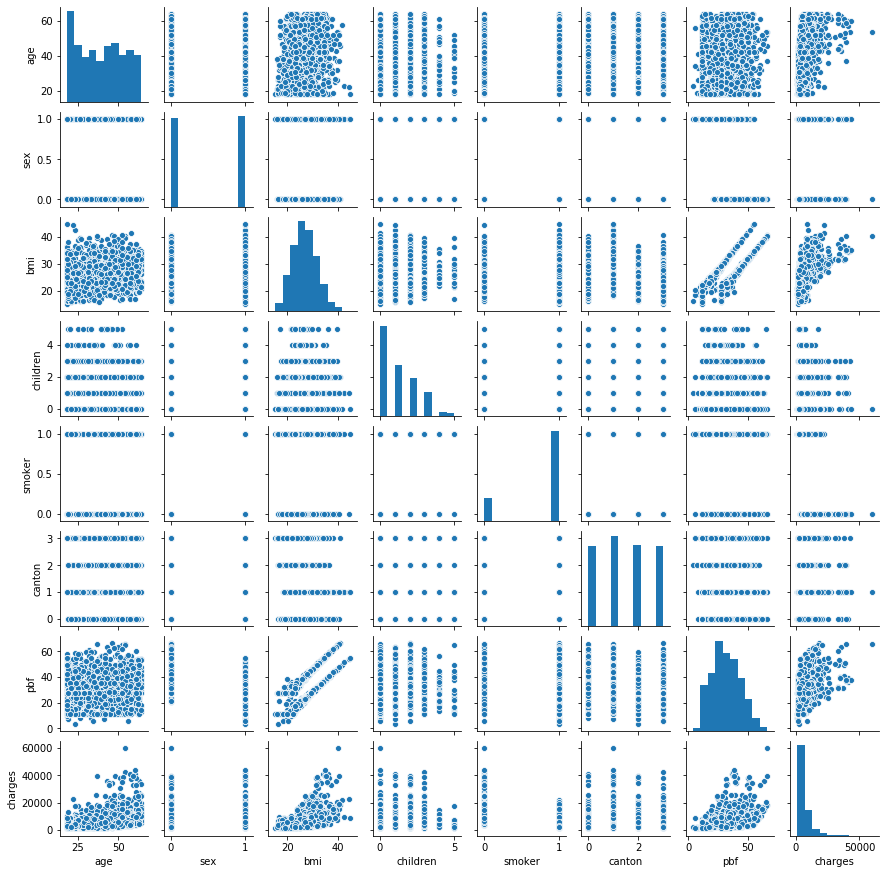

In [4]:
sn.pairplot(data, height=1.5)

### Standardize data with Standardscaler

In [57]:
features_without_charges = ['age', 'bmi', 'sex', 'pbf', 'children', 'smoker', 'canton']
features = ['charges', 'age', 'bmi', 'sex', 'pbf', 'children', 'smoker', 'canton']


x = data.loc[:, features_without_charges].values
y = data.loc[:, ['charges']].values
x = StandardScaler().fit_transform(x)
x
pd.DataFrame(data = x, columns = features_without_charges).head()

,age,bmi,sex,pbf,children,smoker,canton
0,-1.438295,-0.455136,-1.009771,0.353769,-0.909234,-1.974192,-1.345316
1,-1.509470,0.508698,0.990324,-0.403891,-0.079442,0.506536,-0.439632
2,-0.797722,0.382267,0.990324,-0.398884,1.580143,0.506536,-0.439632
3,-0.441848,-1.308138,0.990324,-1.979288,-0.909234,0.506536,0.466051
4,-0.513023,-0.294223,0.990324,-0.822773,-0.909234,0.506536,0.466051


### Let's calcualte the principal components using PCA() 

(1337, 7)


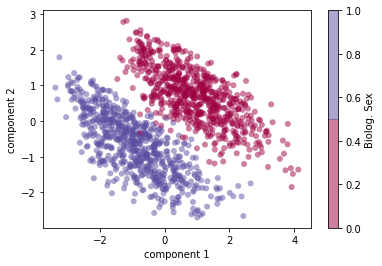

In [58]:
pca = PCA(7)
print(x.shape)
projected = pca.fit_transform(x)

PCs = pca.components_

plt.scatter(projected[:, 0], projected[:, 1],
            c=data.sex, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 2))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar(label = "Biolog. Sex");
plt.show()

This is the PCA plot of the first two principal components without using charges as a feature. We can see a very strong difference between the data in 2 dimensions. This is due to the biological sex as seen with the color

In the next plots, we plotted the first two principal components using charges as opposed to leaving it out like in the last plot. Furthermore, the first plot is color-coded based on the entry's charges. We can see strong differences between the charges. There seems to exist some kind of linear correlation in this broken down 2D space. 
The rest of the plots each show a different color-coded feature. This can be used to categorize the health insurance premiums into circa 5 categories (needs further thought).

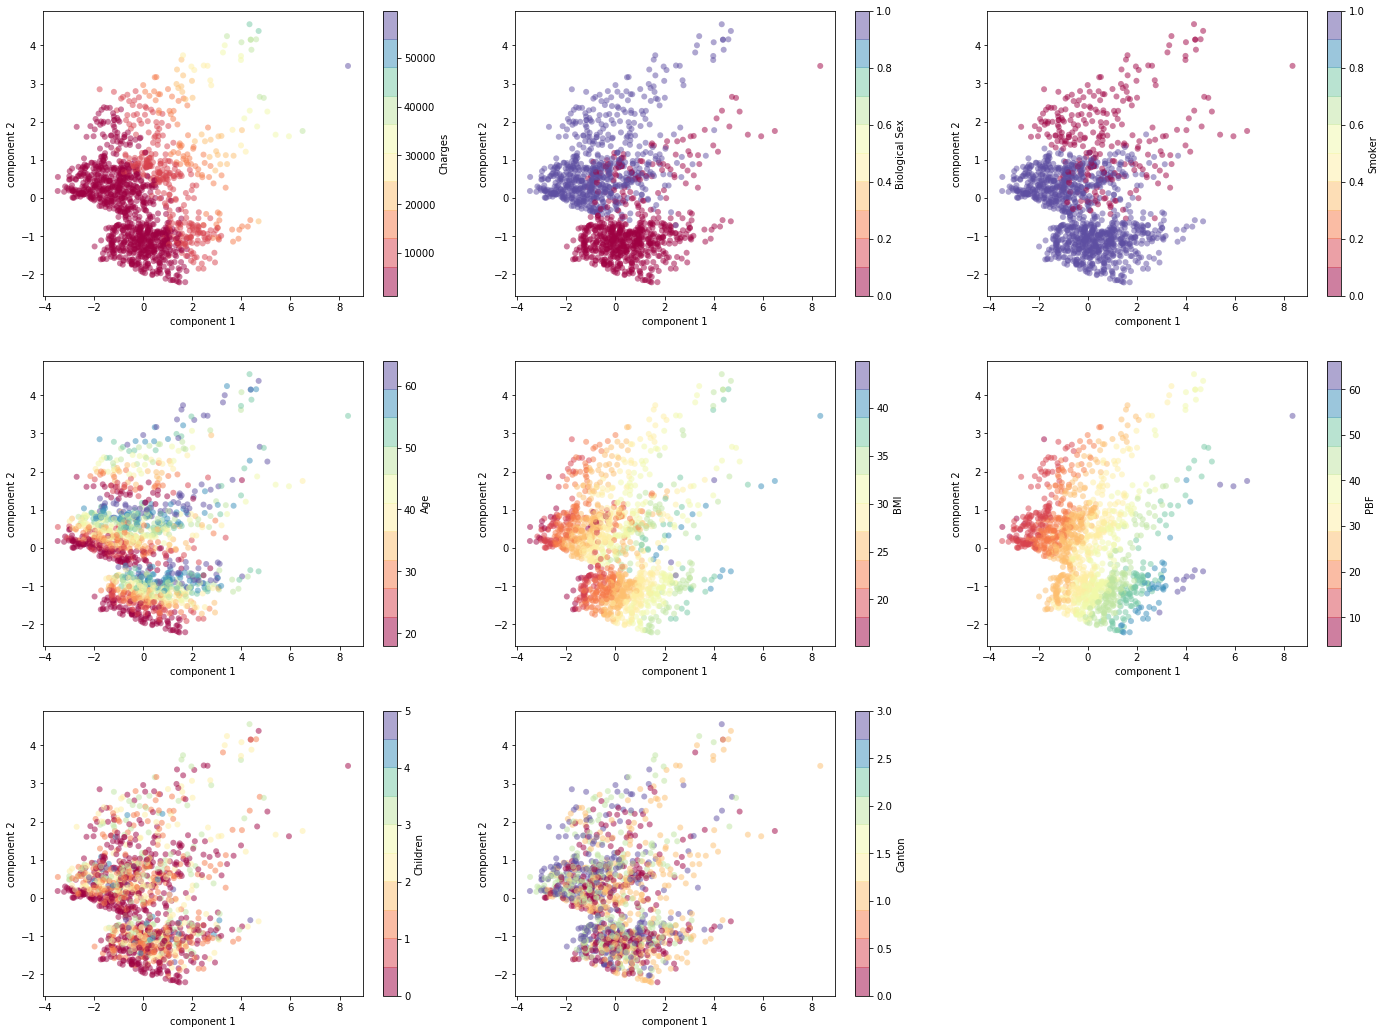

In [102]:
pca = PCA(8)
x = data.loc[:, features].values
x = StandardScaler().fit_transform(x)
projected = pca.fit_transform(x)

PCs = pca.components_
plt.rcParams["figure.figsize"] = (20,15) 
plt.subplot(3, 3, 1)
plt.scatter(projected[:, 0], projected[:, 1],
            c=data.charges, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar(label = "Charges");

plt.subplot(3, 3, 2)
plt.scatter(projected[:, 0], projected[:, 1],
            c=data.sex, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar(label = "Biological Sex");
plt.tight_layout(pad=3)

plt.subplot(3, 3, 3)
plt.scatter(projected[:, 0], projected[:, 1],
            c=data.smoker, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar(label = "Smoker");
plt.tight_layout(pad=3)

plt.subplot(3, 3, 4)
plt.scatter(projected[:, 0], projected[:, 1],
            c=data.age, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar(label = "Age");
plt.tight_layout(pad=3)

plt.subplot(3, 3, 5)
plt.scatter(projected[:, 0], projected[:, 1],
            c=data.bmi, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar(label = "BMI");
plt.tight_layout(pad=3)

plt.subplot(3, 3, 6)
plt.scatter(projected[:, 0], projected[:, 1],
            c=data.pbf, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar(label = "PBF");
plt.tight_layout(pad=3)

plt.subplot(3, 3, 7)
plt.scatter(projected[:, 0], projected[:, 1],
            c=data.children, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar(label = "Children");
plt.tight_layout(pad=3)

plt.subplot(3, 3, 8)
plt.scatter(projected[:, 0], projected[:, 1],
            c=data.canton, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar(label = "Canton");
plt.tight_layout(pad=3)

plt.show()

### What's the explained variance?

In [7]:
print(pca.explained_variance_ratio_)

[0.29346514 0.19016417 0.13533824 0.1286324  0.12165913 0.10712267
 0.0225423  0.00107595]


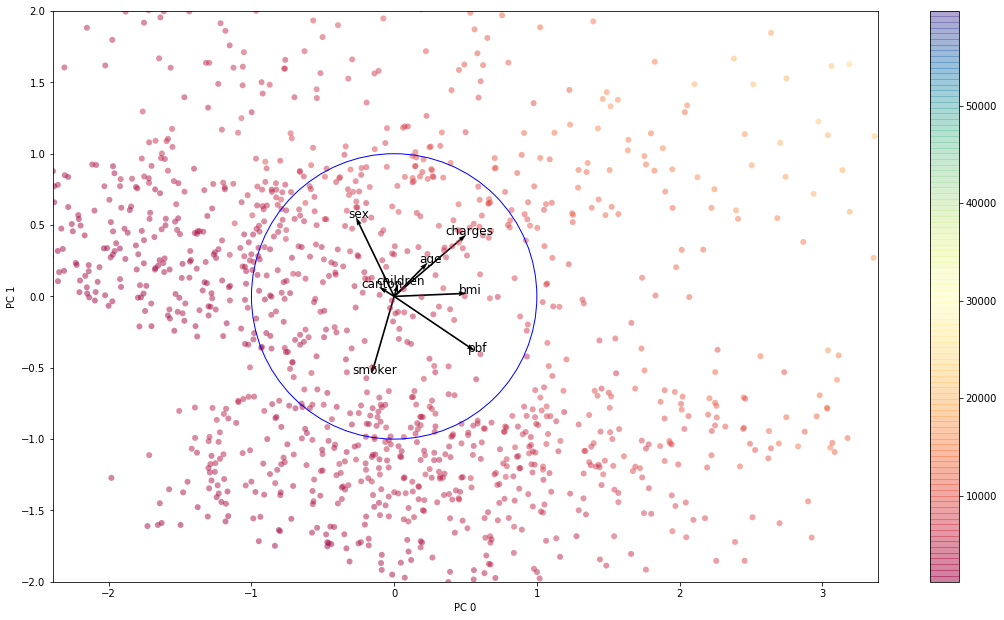

In [8]:
# Use quiver to generate the basic plot
fig = plt.figure(figsize=(6,3))

#vectors
plt.quiver(np.zeros(PCs.shape[1]), np.zeros(PCs.shape[1]),
    PCs[0,:], PCs[1,:], 
    angles='xy', scale_units='xy', scale=1, width=0.002 )

# Add labels based on feature names (here just numbers)
for i,j,z in zip(PCs[1,:]+0.02, PCs[0,:]+0.02, features):
    plt.text(j, i, z, ha='center', va='center', fontsize = "large")

plt.scatter(projected[:, 0], projected[:, 1],
            c=data.charges, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 100))
# Add unit circle
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

# Ensure correct aspect ratio and axis limits
plt.axis('equal')
plt.xlim([-2.0,3.0])
plt.ylim([-2.0,2.0])

# Label axes
plt.xlabel('PC 0')
plt.ylabel('PC 1')

plt.colorbar();
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)
plt.show()

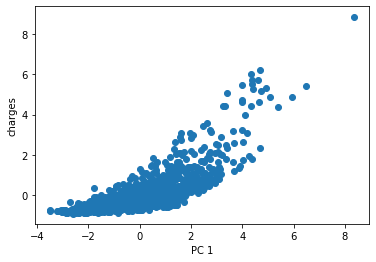

In [9]:
data_pca = pca.transform(x)
plt.scatter(data_pca[:,0], x[:,0])
plt.xlabel('PC 1') and plt.ylabel('charges')
plt.show()

## Metriken in PCA

- Korrelation zegien

#TODO Manual computation of eigenvalues:

In [11]:
n_samples = x.shape[0]
# We center the data and compute the sample covariance matrix.
x -= np.mean(x, axis=0)
cov_matrix = np.dot(x.T, x) / n_samples
for eigenvector in pca.components_:
    print(np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))

2.3477210962790407
1.521313377782267
1.082705936314338
1.0290591999620944
0.9732730172388795
0.8569813673611681
0.18033841338945833
0.008607591672745322


Even easier with np.linalg.eig of covariance matrix:

In [12]:
centered_matrix = x - x.mean(axis=1)[:, np.newaxis]
cov = np.dot(centered_matrix, centered_matrix.T)
eigvals, eigvecs = np.linalg.eig(cov)

x

array([[-0.40895569, -1.43829473, -0.45513613, ..., -0.90923416,
        -1.97419247, -1.34531604],
       [-0.7035418 , -1.50946951,  0.50869838, ..., -0.07944162,
         0.50653623, -0.43963248],
       [-0.59568879, -0.79772176,  0.38226694, ...,  1.58014347,
         0.50653623, -0.43963248],
       ...,
       [-0.61444583, -1.50946951,  1.01442416, ..., -0.90923416,
         0.50653623, -0.43963248],
       [-0.75143926, -1.29594518, -0.79994915, ..., -0.90923416,
         0.50653623, -1.34531604],
       [ 2.06195021,  1.5510458 , -0.26302601, ..., -0.90923416,
        -1.97419247,  0.46605108]])

#### This is the PCA class that imitates sklearn

In [1]:
class PCA():
    
    def __init__(self, n_components = None):
        '''Implements a Ridge Regression estimator.
        
        Arguments
        ---------
        #NOT YET IMPLEMENTED components: Number of components to keep. if n_components is not set all components are kept.
        
    
        
        Attributes
        ---------
        cov_matrix: covariance matrix of data 
        variance: total variance of all principal components
        explained_variance: array of percentage of total variance for each principal component
        
        '''
        self.n_components_ = n_components
        self.components_ = []
        
        self.cov_matrix_ = []
        self.variance_ = []
        self.total_var_ = None
        self.explained_variance_ = []
        self.singular_values = []
        self.U = None
        self.S = None
        self.Sigma = None
        self.projected_ = None

    def fit(self, X):
        
        '''
        fits sorted eigenvalues and eigenvectors to class attributes. same goes for variance and explained variance.
        '''
        
        self.x_mean = X - np.mean(X, axis=0) 
        
        U, S, Vt = np.linalg.svd(X, full_matrices= False)
        
        self.U = U
        self.S = S
        self.Sigma = np.diag(S)
        
        self.components_ = np.real(Vt)
        idx = np.argsort(self.S)[::-1]
        
        #eigenwert berechnen und varianz berechnen mit np.cov weil ich mit svd irgendwo noch einen Fehler hatte
        
        self.eigvalues_ = self.S[idx]
        
        self.components_ = self.components_[idx]
        
        if(self.n_components_ != None):
            self.components_ = self.components_[0: self.n_components_]
        
        test = np.cov(X)
        (self.eigvalues_, components) = np.linalg.eigh(test)
        
        idx = self.eigvalues_.argsort()[::-1]   
        self.eigvalues_ = self.eigvalues_[idx]
        self.total_variance_ = np.sum(self.eigvalues_)
        self.explained_variance_ = self.eigvalues_ / self.total_variance_
        
        self.variance_ = (S**2) / (len(self.x_mean) - 1)
        
        #self.total_var_ = np.sum(self.variance_)
        #print(self.total_var_)
        #self.explained_variance_ = self.variance_ / self.total_var_
        #print(self.explained_variance_)
        
        
        
        #self.variance_ = (S**2) / (len(self.x_mean) - 1)
        #self.total_var = self.variance_.sum()
        #self.explained_variance_ = self.variance_ / self.total_var
        self.singular_values_ = S.copy()
        
        return self
        
    def transform(self, X):
        
        self.projected_ = np.dot(X, self.components_.T) 
        
        return self.projected_
    
    def reconstruct(self, X):
        return np.dot(self.components_, X)

In [2]:
pca2 = PCA(8)

pca2.fit(x)
pca2.transform(x)
pca2.components_.shape

NameError: name 'x' is not defined